<a href="https://colab.research.google.com/github/1900690/removebg-semantic-image-making/blob/main/%E7%94%BB%E5%83%8F%E3%83%AA%E3%82%B5%E3%82%A4%E3%82%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
shutil.rmtree("/content/syakuyaku-semantic-augmented-black-back_20250211005341")

In [38]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os

#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
file_name ="syakuyaku-semantic-augmented-black-back_20250211010112.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

In [19]:
#@title 関数定義
import cv2
from IPython.display import Image, display


def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。"""
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

def scale_box(img, width, height):
    """指定した大きさに収まるように、アスペクト比を固定して、リサイズする。"""
    h, w = img.shape[:2]
    aspect = w / h
    if width / height >= aspect:
        nh = height
        nw = round(nh * aspect)
    else:
        nw = width
        nh = round(nw / aspect)

    dst = cv2.resize(img, dsize=(nw, nh))

    return dst


(121, 135, 3) -> (574, 640, 3)


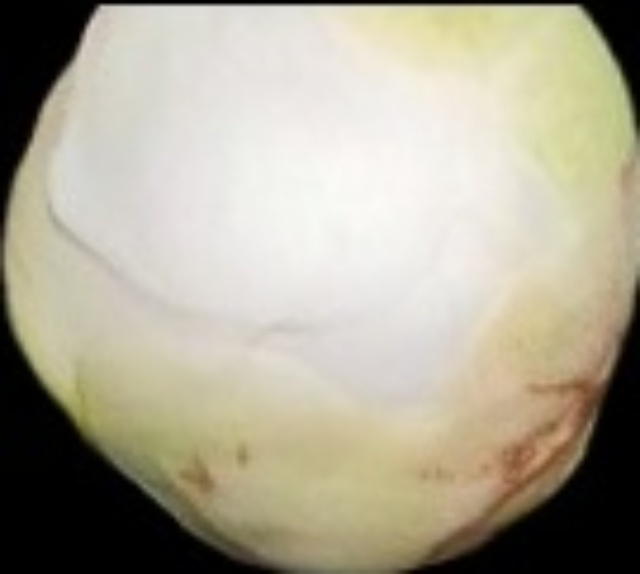

In [39]:
# 指定した大きさに収まるようにリサイズする。
import glob
import os
import csv
import pprint

if os.path.exists("/content/result"):
  shutil.rmtree("/content/result")
if os.path.exists("/content/sample_writer_row.csv"):
  os.remove("/content/sample_writer_row.csv")


os.makedirs('/content/result')

with open('/content/sample_writer_row.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["name","Width","Height","x1","y1","x2","y2"])

file_list = sorted(glob.glob('/content/syakuyaku-semantic-augmented-black-back_20250211010112/*.jpg'))

for file_name in file_list:
  img = cv2.imread(file_name)
  dst = scale_box(img, 640, 640)
  cv2.imwrite('/content/result/'+os.path.basename(file_name), dst)

  with open('/content/sample_writer_row.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerows([[os.path.basename(file_name),dst.shape[0],dst.shape[1],1,1,dst.shape[:2][1]-1,dst.shape[:2][0]-1]])

print(f"{img.shape} -> {dst.shape}")
imshow(dst)

In [40]:
#@markdown 作ったファイルをダウンロード
import shutil
import os

shutil.make_archive('/content/result', 'zip', '/content/result')

'/content/result.zip'